In [1]:
using Distributions
using Plots

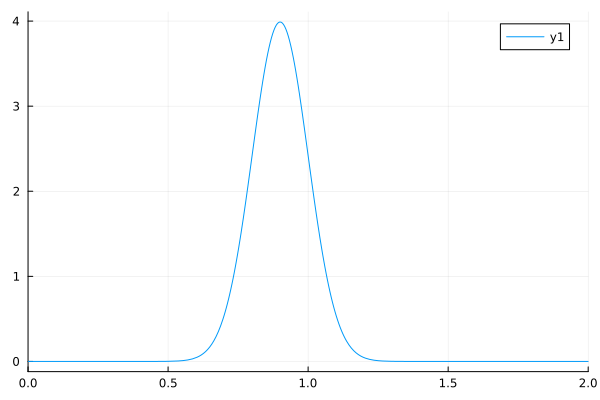

In [2]:
n = Normal(0.9, 0.1)
plot(x->pdf(n, x), xlims=(0, 2))

In [3]:
function fitness(nmut, dist)
    f = 1.0
    for i in 1:nmut
        df = max(0.0, rand(dist))
        f *= df
    end
    
    f
end

function pop_fitness(p_mut, t, mu, sigma, n)
    nmuts = zeros(Int, n)
    
    dmut = Poisson(p_mut * 30000)
    
    for i in 1:t
        for j in 1:length(nmuts)
            nmuts[j] += rand(dmut)
        end
    end
    
    nd = Normal(mu, sigma)
    
    [fitness(n, nd) for n in nmuts]
end 

pop_fitness (generic function with 1 method)

In [4]:
@time fs = pop_fitness(0.00001, 20, 0.9, 0.1, 100000);
sum(fs) / length(fs)

  0.023042 seconds (4 allocations: 1.526 MiB)


0.5471462962489172

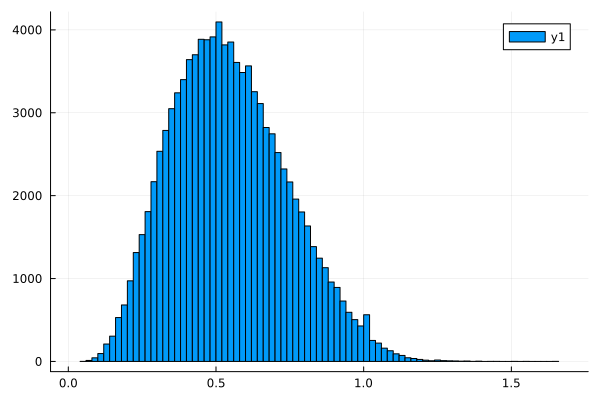

In [5]:
histogram(fs)

In [6]:
cs_fs = cumsum(fs);

In [7]:
trans = [ fs[searchsortedfirst(cs_fs, rand()*cs_fs[end])] for i in 1:1000000 ];

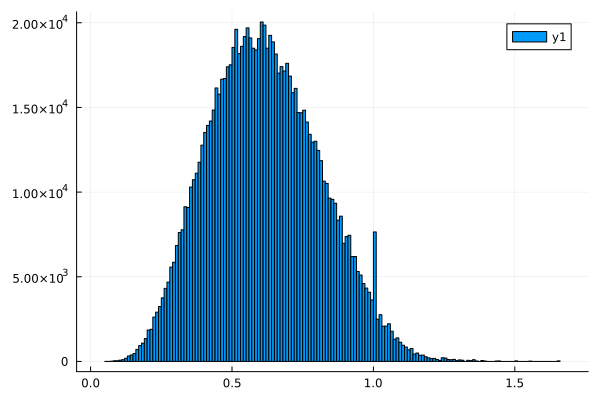

In [8]:
histogram(trans)

In [9]:
sum(trans)/length(trans)

0.6170561104178561